In [1]:
import matplotlib.pyplot as plt
import pymc3 as mc3

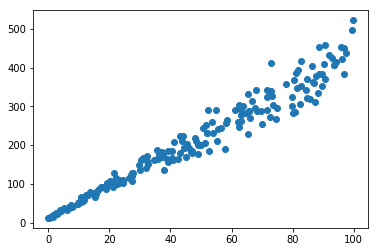

In [2]:
# Generate some data that is linearly related
numRecords = 200
x = np.random.uniform(low=0, high=100, size=numRecords)

# These are the linear parameters
m = 4.2
b = 12.0
y = m*x+b
# Add some noise
sigma=0.1
noise = sigma * np.random.randn(numRecords) + 1.
y *= noise
plt.scatter(x,y)

##### OLS Linear Regression

In [3]:
# Takes a matrix of features (with intercept as first column) 
# and response vector and calculates linear regression coefficients
def linear_regression(x, y):
    # Equation for linear regression coefficients
    beta = np.matmul(np.matmul(np.linalg.inv(np.matmul(x.T, x)), x.T), y)
    return beta

In [4]:
x = np.reshape(x, newshape=[-1,1])
intercept = np.ones(shape=[numRecords,1])
x = np.concatenate((x,intercept), axis=1)
y = np.reshape(y, newshape=[-1,1])

slope, intercept = linear_regression(x,y)
print(slope, intercept)

[4.19145888] [10.63372192]


In [5]:
xs = np.linspace(0,100, 100)
ys = intercept+slope * xs

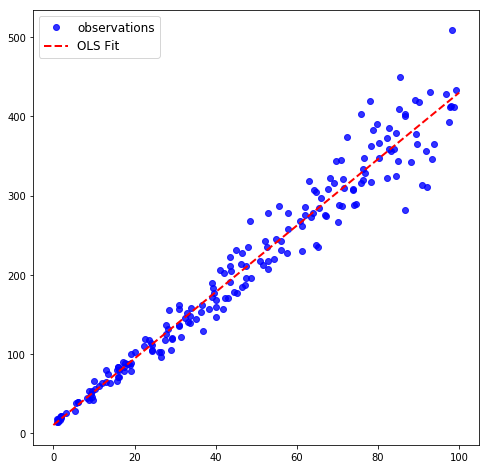

In [6]:
plt.figure(figsize=(8, 8))
plt.plot(x[:,0],y, 'bo', label = 'observations', alpha = 0.8);
plt.plot(xs, ys, 'r--', label = 'OLS Fit', linewidth = 2)
plt.legend(prop={'size': 12})

In [7]:
with mc3.Model() as linear_model_500:
    intercept = mc3.Normal('Intercept', mu = 0, sd = 10)
    slope     = mc3.Normal('slope', mu = 0, sd = 10)
    sigma     = mc3.HalfNormal('sigma', sd = 10)
    
    mean = intercept + slope * x[:,0]
    
    # Observed values
    Y_obs = mc3.Normal('Y_obs', mu = mean, sd = sigma, observed = y)
    
    # Sampler
    step = mc3.NUTS()

    # Posterior distribution
    linear_trace_500 = mc3.sample(1000, step)

Sequential sampling (2 chains in 1 job)
NUTS: [sigma, slope, Intercept]
 14%|█▍        | 211/1500 [00:01<01:05, 19.70it/s]/home/tbrownex/tensorflow/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)

Only one chain was sampled, this makes it impossible to run some convergence checks


In [2]:
help(mc3.Normal)

NameError: name 'mc3' is not defined

In [9]:
with mc3.Model() as model: # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    sigma = mc3.HalfCauchy('sigma', beta=10, testval=1.)
    intercept = mc3.Normal('Intercept', 0, sd=20)
    x_coeff = mc3.Normal('x', 0, sd=20)

    # Define likelihood
    likelihood = mc3.Normal('y', mu=intercept + x_coeff * x,
                        sd=sigma, observed=y)

    # Inference!
    trace = mc3.sample(3000, cores=2) # draw 3000 posterior samples using NUTS sampling

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [x, Intercept, sigma]
Sampling 2 chains: 100%|██████████| 7000/7000 [00:18<00:00, 371.01draws/s]
The acceptance probability does not match the target. It is 0.9334312868528925, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9503418976961828, but should be close to 0.8. Try to increase the number of tuning steps.


In [14]:
trace

<MultiTrace: 2 chains, 3000 iterations, 4 variables>